**Import all necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

MNIST dataset is 'Hello world' for Data Scientist, It contains total 70000 image with dimension 28*28. Images are divided into two (train and test) set.

Train set contains 6000 images and test set contains rest 10000 images.
![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png)

Keras has its own dataset server containing this MNIST dataset. Lets import that.

In [0]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [73]:
#Input shape
X_train.shape

(60000, 28, 28)

In [74]:
#Target value shape
y_train.shape

(60000,)

**Let visualize some elements from the dataset**

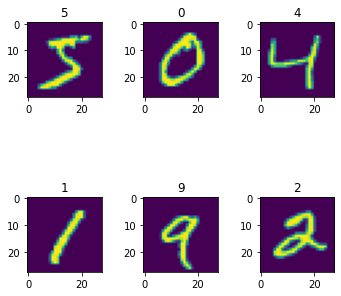

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,3, figsize=(5,5))
fig.tight_layout()

index = 0
for row in ax:
  for col in row:
    col.imshow(X_train[index])
    col.set_title(y_train[index])
    index = index + 1


I also need to change target values (y_train and y_test) into **categorical type**. Keras has a method *to_categorical* that transfer single value into categorical.

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Here, I reshaped 2D image into a 1D vector before training in fully connected layer. 

We also divided each value in X_train and X_test with 255 to keep the value between 0 and 1. This is optional but recommended because of the smaller value, computation cost will decrease.

In [77]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

X_train = X_train/255
X_test = X_test/255

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


Alright, Let design our simple model. With **Keras** framework, It is very easy to design a neural net.


In [78]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Configuring the model with RmsProp optimizer and Cross Entropy loss function
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [80]:
# start training the model
model.fit(X_train,y_train,epochs=30,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s 24us/step - loss: 0.2689 - acc: 0.9220 - val_loss: 0.1402 - val_acc: 0.9602
Epoch 2/30
54000/54000 [==============================] - 1s 22us/step - loss: 0.1140 - acc: 0.9662 - val_loss: 0.0913 - val_acc: 0.9743
Epoch 3/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0747 - acc: 0.9776 - val_loss: 0.0795 - val_acc: 0.9767
Epoch 4/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0534 - acc: 0.9837 - val_loss: 0.0745 - val_acc: 0.9793
Epoch 5/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0397 - acc: 0.9879 - val_loss: 0.0717 - val_acc: 0.9812
Epoch 6/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0306 - acc: 0.9911 - val_loss: 0.0743 - val_acc: 0.9793
Epoch 7/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0225 - acc: 0.9936 - val_loss: 0.0688 - val_acc:

In [81]:
test_loss, test_acc = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 47us/step


In [69]:
print(test_acc)

0.9825999736785889


Results

|Train Set | Validation Set | Test Set|
|----------|----------------|---------|
|  0.99    | 0.98           | 0.98    |
